In [ ]:
import numpy as np
import pandas as pd

# Часть 1. Работа с данными

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Junior DA test/Тестовое задание.xlsx').dropna()
df.drop(['good (1)'], axis=1, inplace=True)
df

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260.0,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,866.0,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,163.0,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1146.0,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,823.0,3.283940,4.39674063521296
...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,279.0,10.971214,4.857810387061303
225,greetings,2.0,Кластер 2,sapphire grounds,335.0,1.160626,3.642819729434763
226,greetings,3.0,Кластер 3,entire ethical speakers,1782.0,7.985910,6.003699268483375
227,greetings,3.0,Кластер 3,courtesy textiles diameter,84.0,0.509490,4.151198803764073


Удаление неформатных значений

In [ ]:
df.dtypes

area             object
cluster         float64
cluster_name     object
keyword          object
count            object
x               float64
y                object
dtype: object

In [ ]:
for index, row in df.iterrows():
    try:
      row['y'] = float(row['y'])
      row['count'] = float(row['count'])
    except:
      df.drop(index,inplace=True)

Цвета из цветовых палеток Tableu

In [ ]:
import matplotlib.colors as mcolors
colors = np.array(list(mcolors.TABLEAU_COLORS.values()))
colors

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], dtype='<U7')

Создание колонки color

In [ ]:
color_column = pd.Series()

for area in df.area.unique():
  temp_df = df.where(df['area']==area).dropna(how='all')
  temp_df.drop_duplicates(subset=['keyword'])                                   #удаление дубликатов слов в рамках одной области

  np.random.shuffle(colors)                                                     #перемешивание цветов
  
  color_column = color_column.append(
      pd.Series(temp_df.apply(lambda row: colors[int(row.cluster)],axis=1))
      )                                                                         #цвет по номеру кластера 
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Объединение с исходным датафреймом

In [ ]:
df = df.merge(color_column.rename('color'), left_index=True, right_index=True)

Сортировка

In [ ]:
df.sort_values(by=['area','cluster','cluster_name','count'],
               ascending=[True,True,True,False], inplace=True)

In [ ]:
df

,area,cluster,cluster_name,keyword,count,x,y,color
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106798807182176,#ff7f0e
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259495712252914,#ff7f0e
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809914970161072,#ff7f0e
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613982972088637,#ff7f0e
110,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220011967033064,#2ca02c
...,...,...,...,...,...,...,...,...
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994491947961,#ff7f0e
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.5533676310113189,#ff7f0e
105,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.65152738334079,#d62728
103,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906339823131932,#d62728


In [ ]:
df.to_excel('/content/drive/MyDrive/Junior DA test/Выходные данные.xlsx')

# Часть 2. Построение графиков

In [ ]:
temp_df = df.where(df['area']=='worlds').dropna(how='all')
temp_df

,area,cluster,cluster_name,keyword,count,x,y,color
91,worlds,0.0,Кластер 0,harmful cultures,1866.0,4.786518,4.658916849525424,#e377c2
93,worlds,0.0,Кластер 0,island holland electric,1335.0,9.223316,14.683999423537758,#e377c2
94,worlds,0.0,Кластер 0,legends directive,1062.0,5.193632,3.4290455309766577,#e377c2
92,worlds,0.0,Кластер 0,covered harvest rights,973.0,0.162540,13.574503956024905,#e377c2
95,worlds,1.0,Кластер 1,retirement privilege pathology,1499.0,3.172261,2.7382208013485614,#8c564b
98,worlds,1.0,Кластер 1,notion scenario,1159.0,5.998013,9.48804687078874,#8c564b
97,worlds,1.0,Кластер 1,moderate command dublin,1050.0,8.155550,0.11438091958222096,#8c564b
101,worlds,2.0,Кластер 2,operating stevens,1382.0,11.535669,4.165848723252822,#ff7f0e
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994491947961,#ff7f0e
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.5533676310113189,#ff7f0e


In [ ]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from adjustText import adjust_text

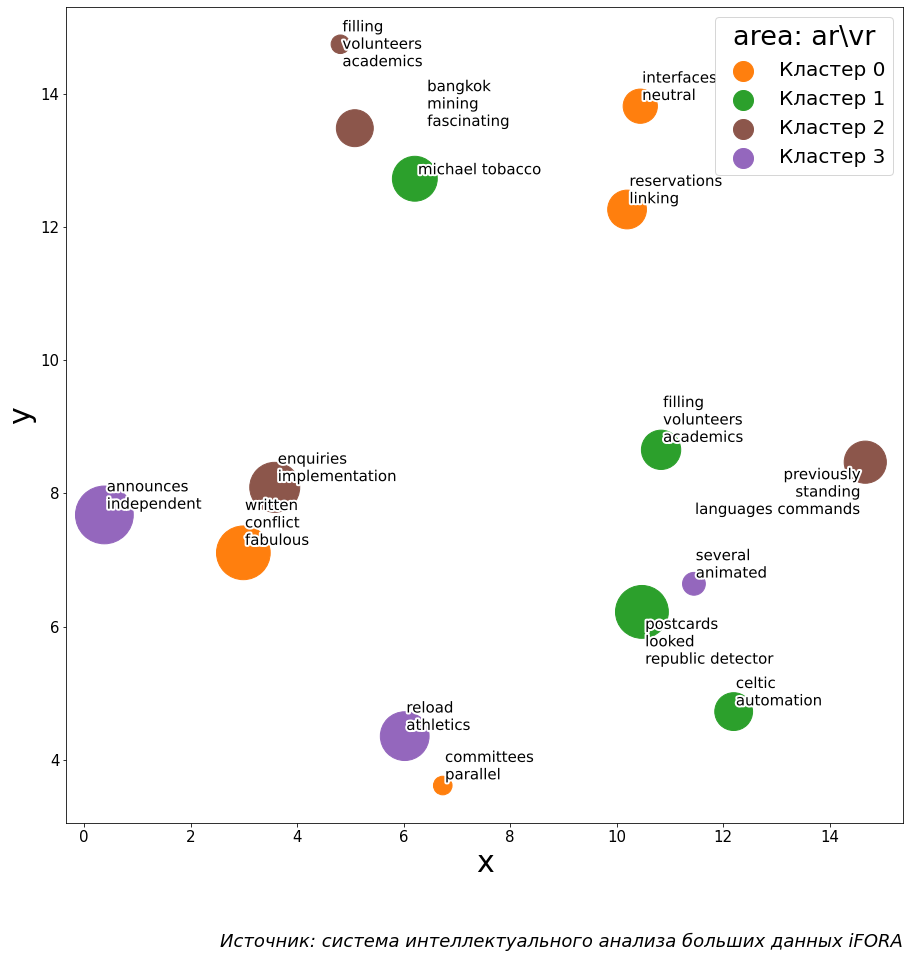

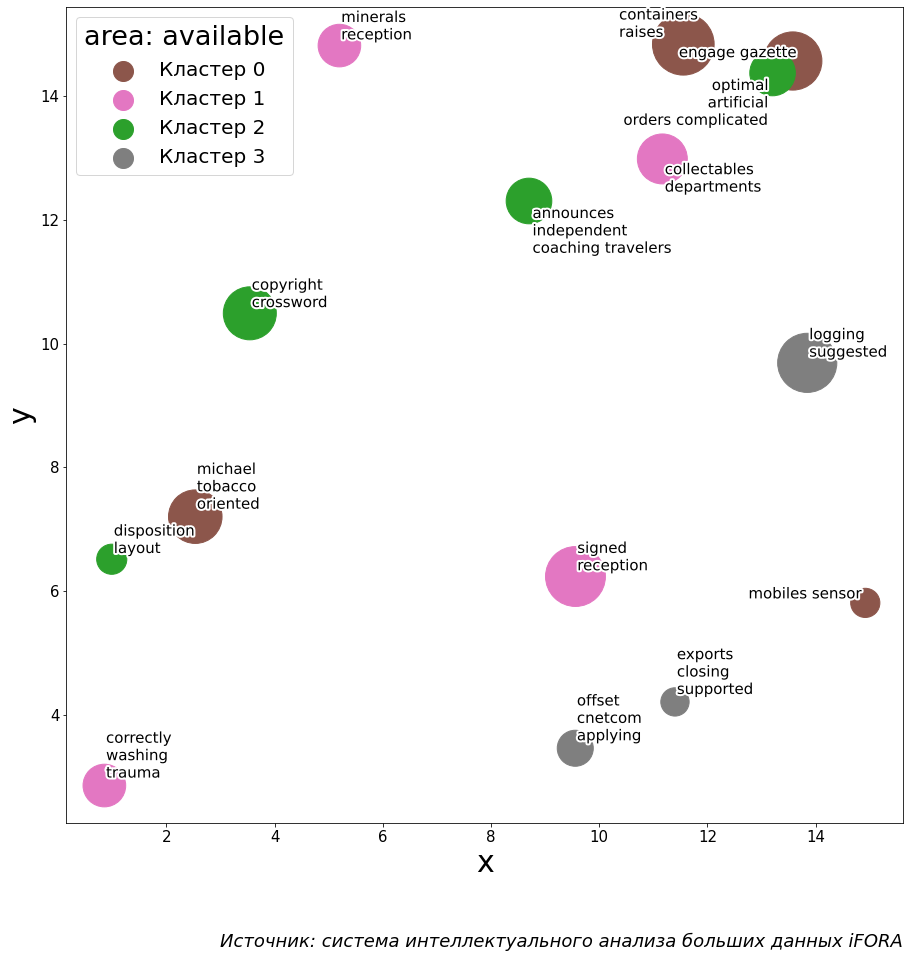

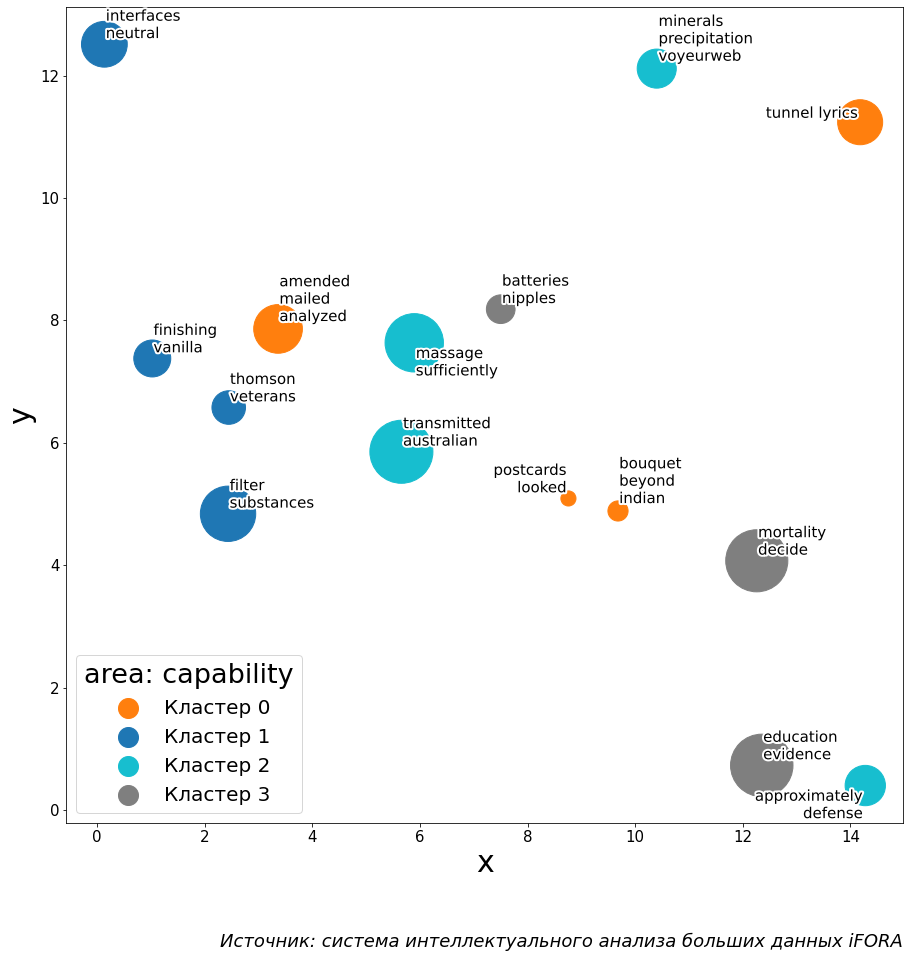

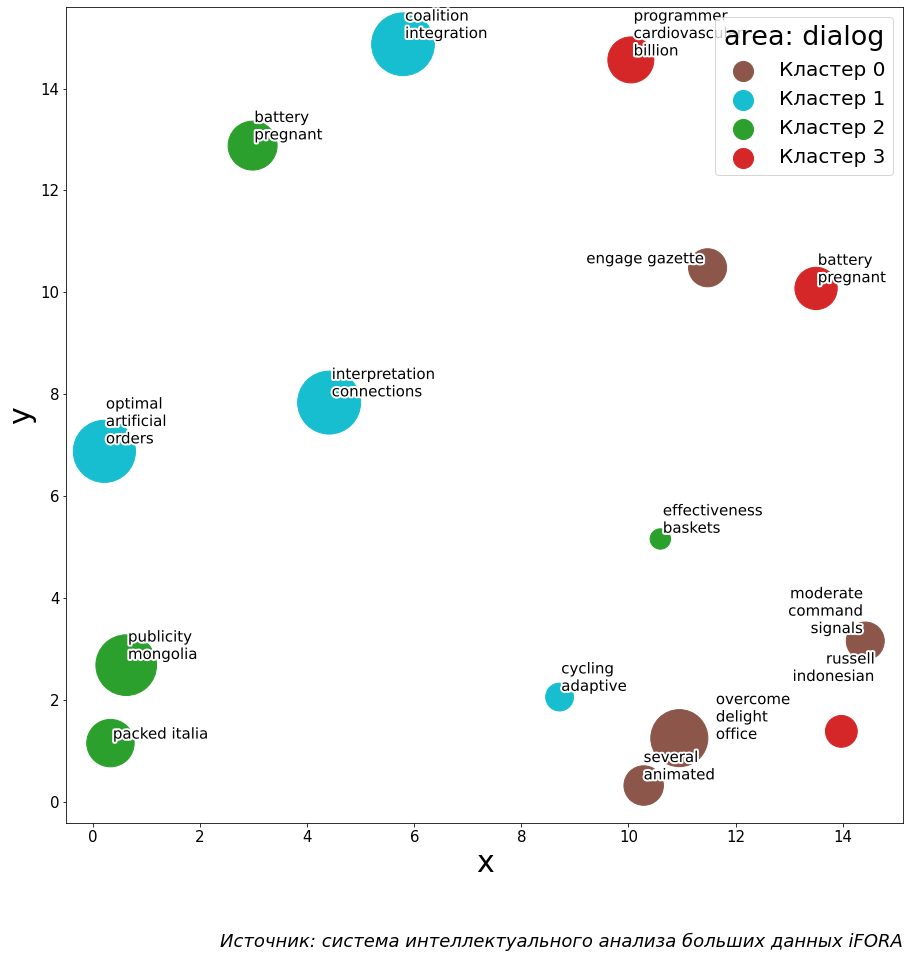

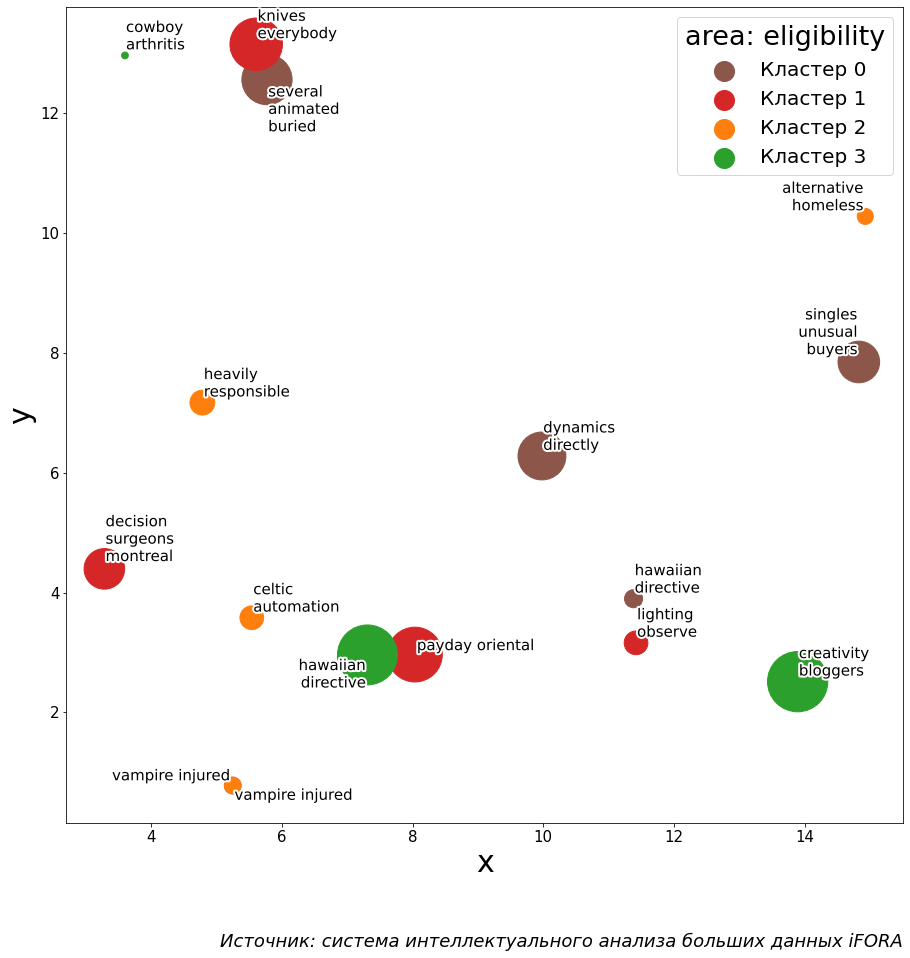

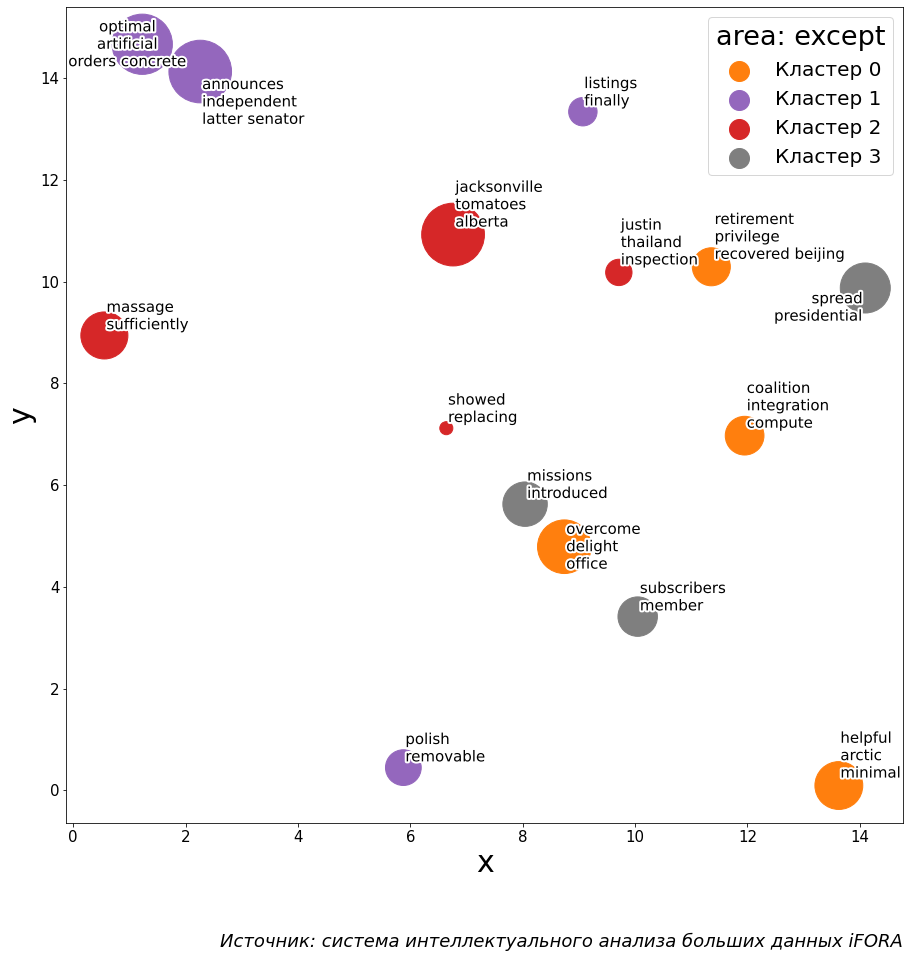

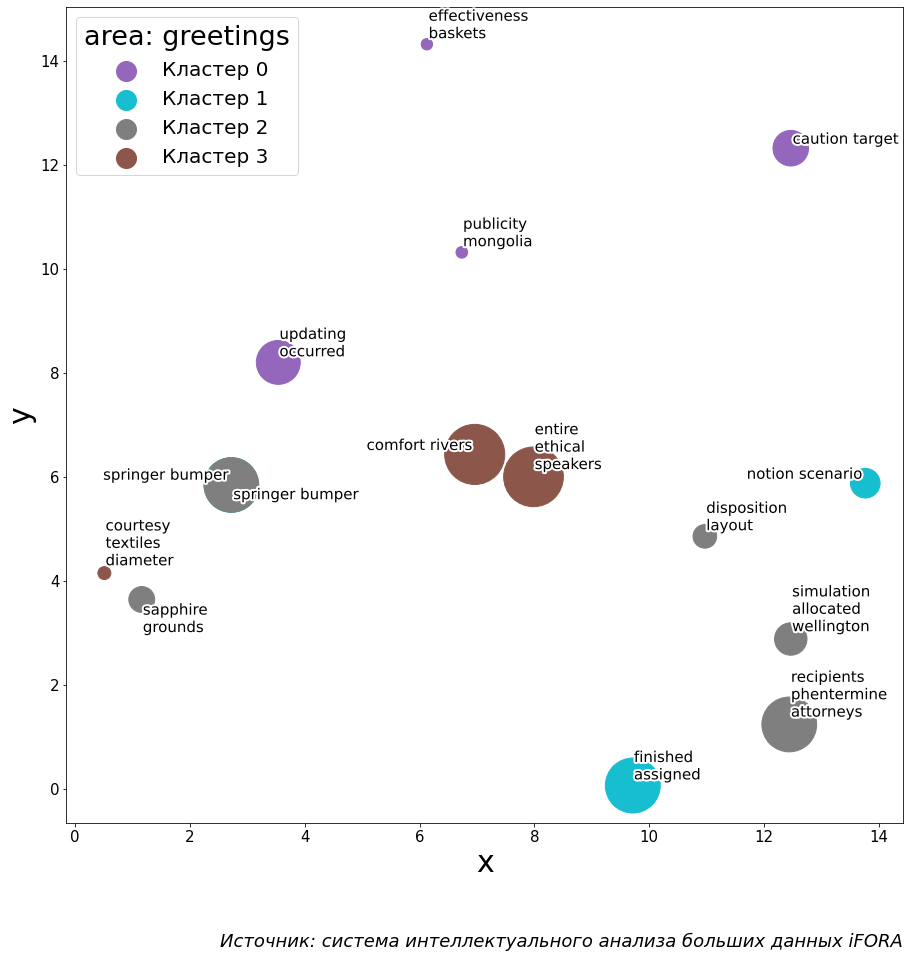

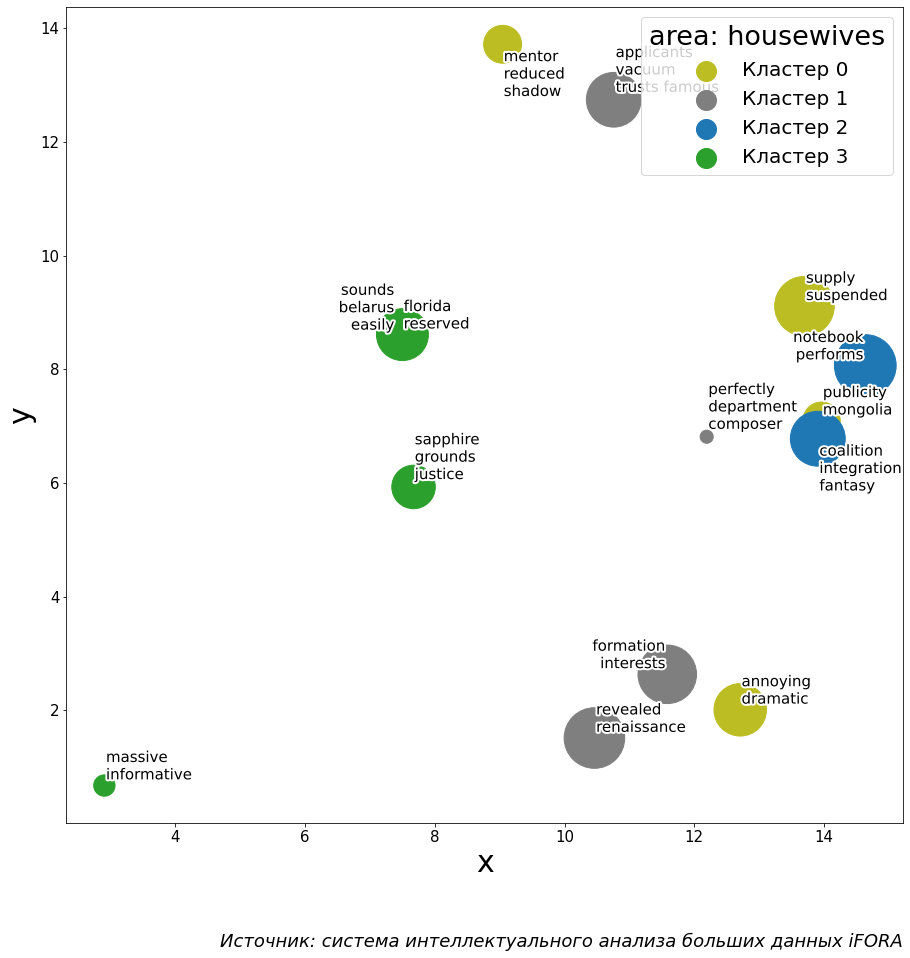

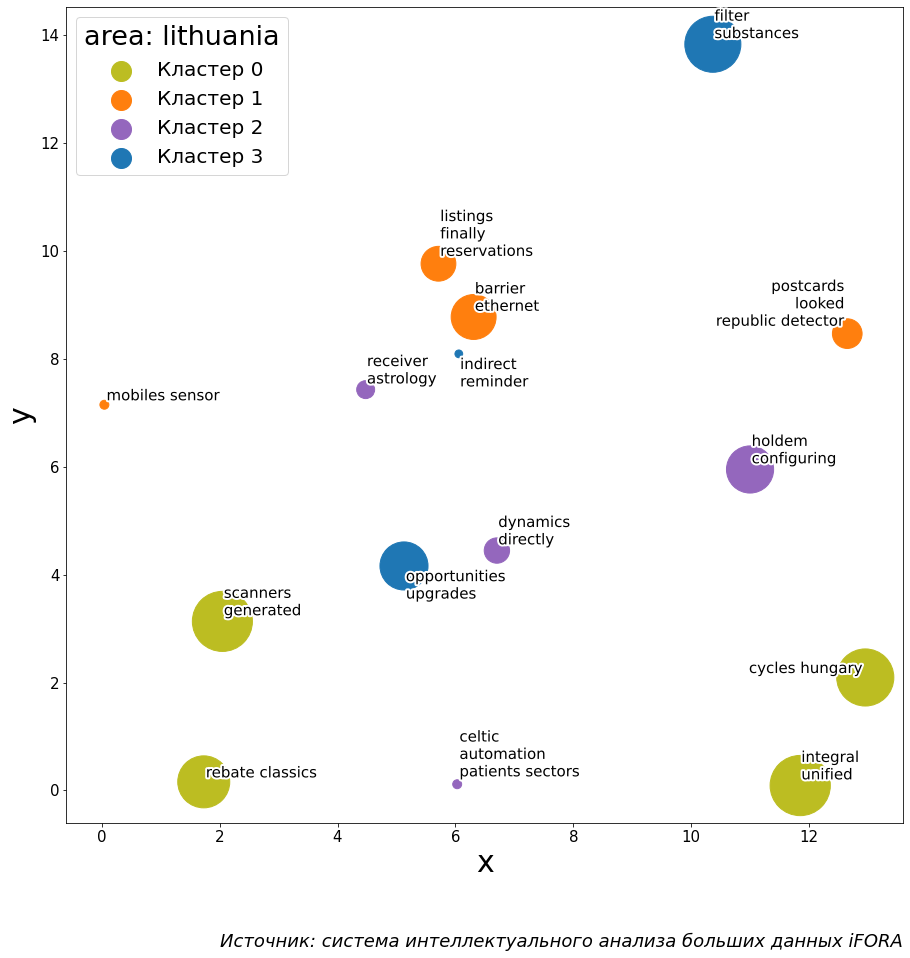

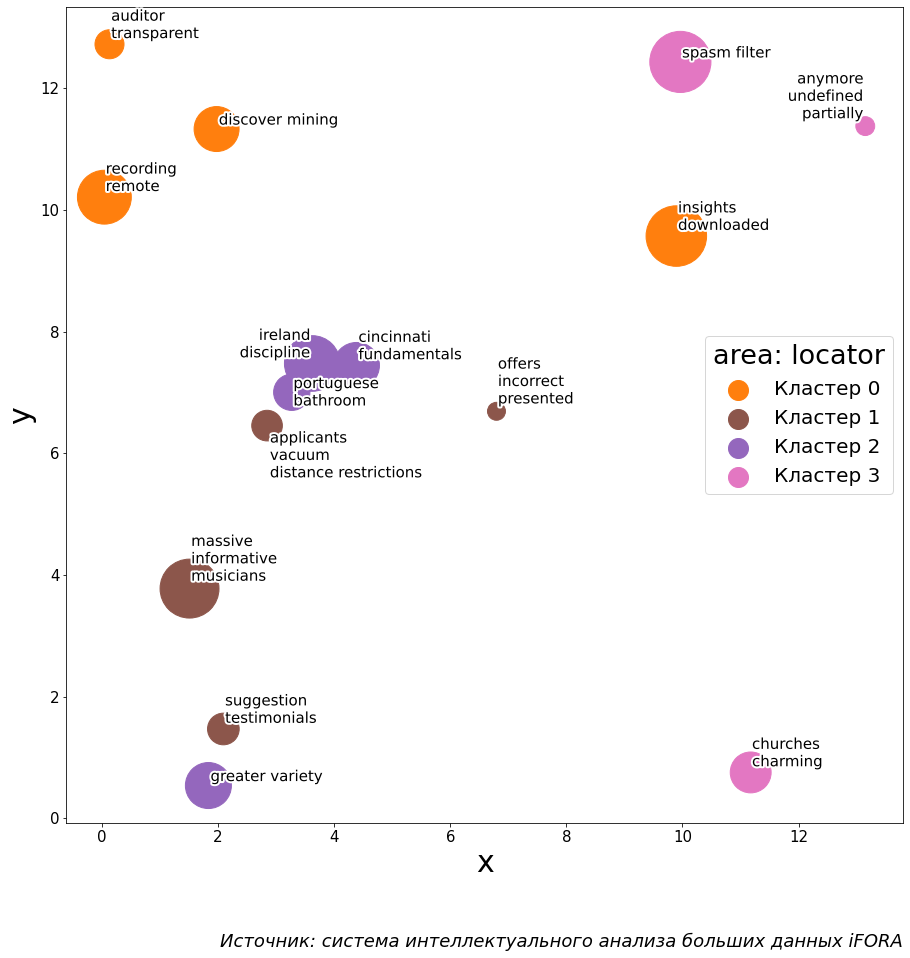

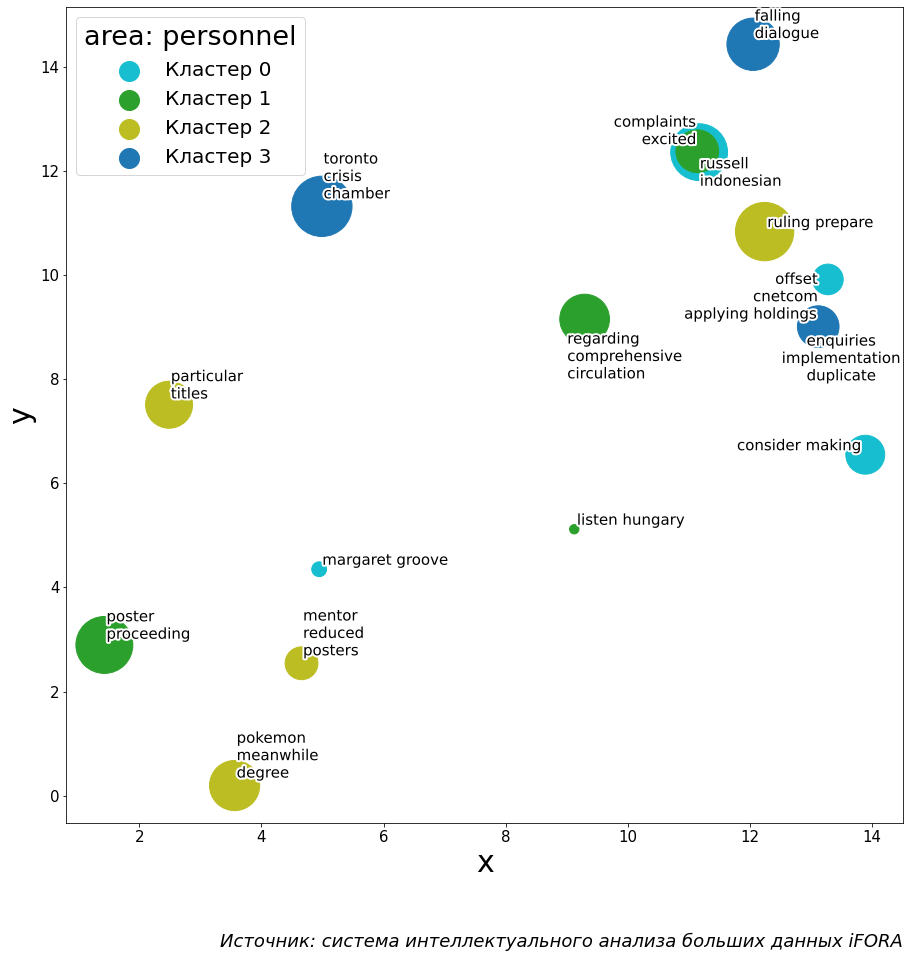

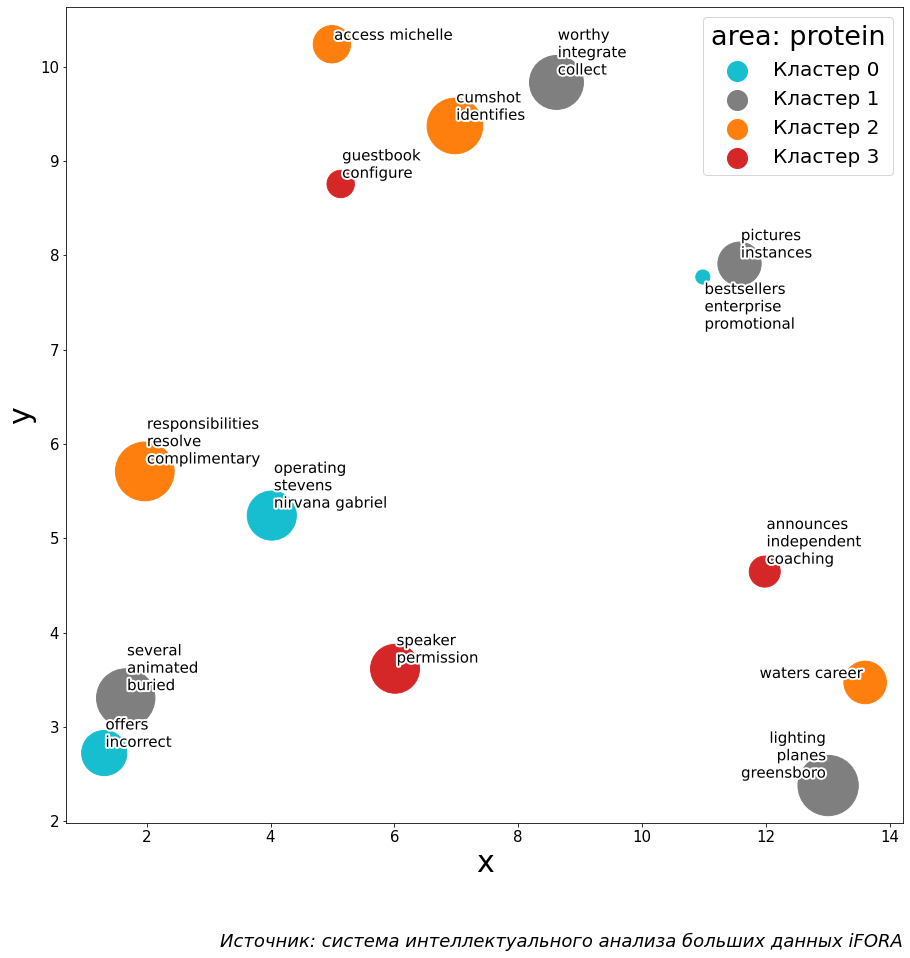

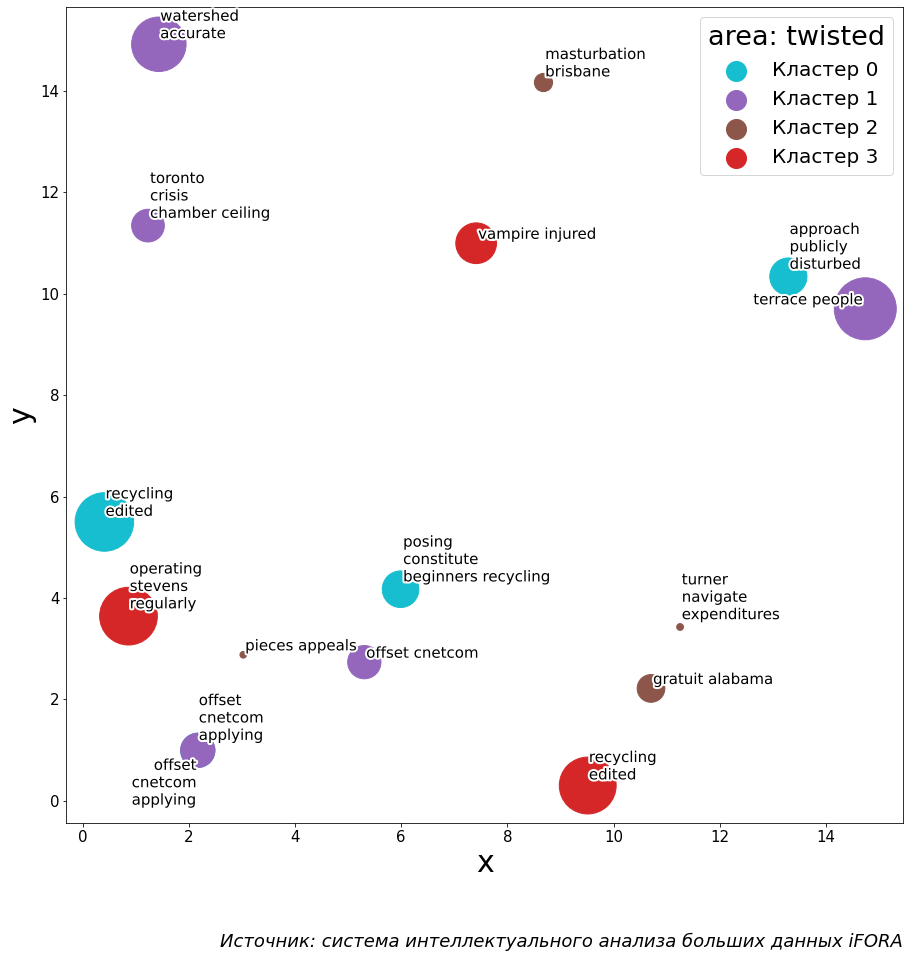

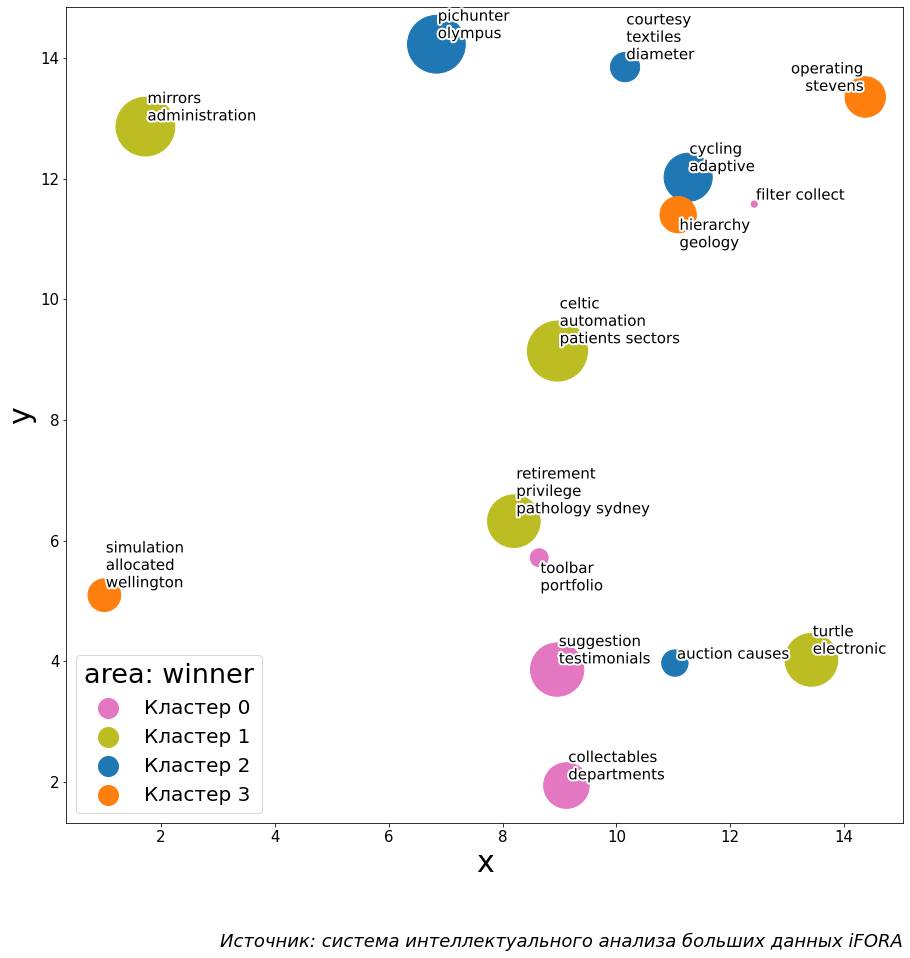

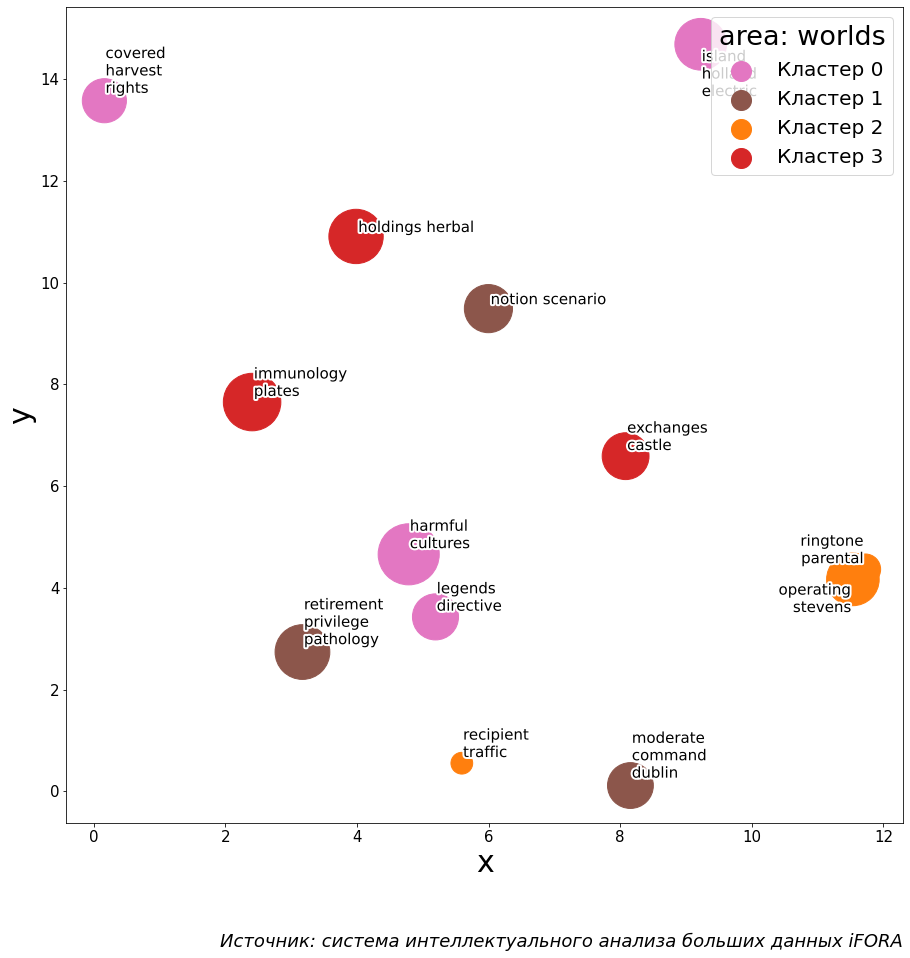

In [ ]:
plt.rcParams.update({'font.size': 15})

for area in df.area.unique():
  plt.subplots(figsize=(15, 15))

  area_df = df.where(df['area']==area).dropna(how='all')

  #отрисовка кластеров
  for cluster_name in area_df.cluster_name.unique():
    cluster_df = area_df.where(area_df['cluster_name']==cluster_name).dropna(how='all')
    
    plt.scatter(x = cluster_df['x'], y = cluster_df['y'].astype(float),
               color=cluster_df['color'].sample(),label=cluster_name,
                s=2*cluster_df['count'].astype(float))
  
  #аннотации
  texts = []    
  for index, row in area_df.iterrows():

    if len(row['keyword'])>15:
      keyword = row['keyword'].replace(' ','\n',2)
    else:
      keyword = row['keyword']
    texts.append(plt.text(row['x'], float(row['y']), keyword, 
            ha='center', va='center',
              path_effects=[pe.withStroke(linewidth=4, foreground="white")]))

  adjust_text(texts)

  #легенда
  lgnd = plt.legend( scatterpoints=1, fontsize=20,title=f'area: {area}')
  plt.rcParams['legend.title_fontsize'] = 27
  lgnd.legendHandles[0]._sizes = [400]
  lgnd.legendHandles[1]._sizes = [400]
  lgnd.legendHandles[2]._sizes = [400]
  lgnd.legendHandles[3]._sizes = [400]

  #футер
  plt.figtext(0.9, 0.01, 
              'Источник: система интеллектуального анализа больших данных iFORA',
              ha="right", fontsize=18,fontstyle='italic')
  plt.xlabel("x",fontsize=30)
  plt.ylabel("y",fontsize=30)
  plt.savefig(f'/content/drive/MyDrive/Junior DA test/Диаграммы/{area}.png',dpi=100)
  plt.show()
